<a href="https://colab.research.google.com/github/Sharan-kalburgi/Dental-website/blob/main/news_groups(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload your dataset.zip file
uploaded = files.upload()


Saving news.zip to news.zip


In [3]:
import zipfile
import io

# Assuming your file is named dataset.zip
with zipfile.ZipFile(io.BytesIO(uploaded['news.zip']), 'r') as zip_ref:
    zip_ref.extractall('/content/news')

Confusion Matrix:
[[19  0  0  0  0  0  2  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  1  1  0  0]
 [ 0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  1  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  1 12  0  0]
 [ 0  0  0  0  0  0  1  0 24  0]
 [ 1  0  0  0  0  0  4  0  0 22]]
Classification Report:
               precision    recall  f1-score   support

     business       0.95      0.90      0.93        21
entertainment       1.00      1.00      1.00        15
         food       1.00      1.00      1.00        13
     graphics       1.00      0.91      0.95        23
   historical       1.00      1.00      1.00        22
      medical       1.00      0.95      0.98        21
     politics       0.69      1.00      0.82        20
        space       0.86      0.92      0.89        13
        sport       1.00      0.96      0.98        25
  technologie       1.00      0.81      0.90        27

     accuracy        

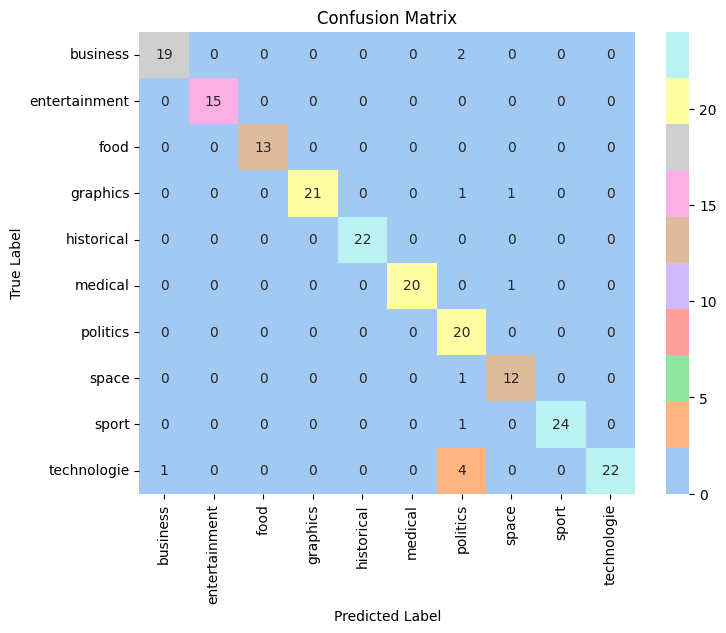

In [4]:
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load data from sub-folders
def load_data(folder_path):
    categories = os.listdir(folder_path)
    data = []
    target = []

    for category in categories:
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            files = os.listdir(category_path)
            for file in files:
                file_path = os.path.join(category_path, file)
                if os.path.isfile(file_path):
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                        data.append(content)
                        target.append(category)

    return data, target

# Load data from your dataset
folder_path = '/content/news'
data, target = load_data(folder_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Create a text classification model pipeline
model = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

# Train the model
model.fit(X_train, y_train)

# Predict the categories for test data
y_pred = model.predict(X_test)

# Print confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report with precision, recall, and F1-score
class_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Define custom color map for the heatmap
cmap = sns.color_palette("pastel", as_cmap=True)

# Visualize the confusion matrix as a colorful bar graph
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
